In [1]:
from wd_2D_functions import *

# Test Plot

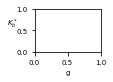

In [2]:
Large_font_size = 12
Medium_font_size = 7
Small_font_size = 5
lw = 1
text_kwargs = dict(ha='center', va='center', color='C1')

#setting figuresize - by default matplotlib uses inches
#size of A4 sheet - 
cm_ = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(figsize=(3*cm_, 2*cm_))
#ax.text(0.5, 1.5, f'Max font : {Large_font_size}pt', fontsize = Large_font_size, **text_kwargs)
#ax.text(0.5, 1.0, f'Med font : {Medium_font_size}pt', fontsize = Medium_font_size, **text_kwargs)
#ax.text(0.5, 0.5, f'Small font : {Small_font_size}pt', fontsize = Small_font_size, **text_kwargs)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size)
ax.set_ylabel(r"$K_b^*$", fontsize = Medium_font_size, rotation = 0)
ax.set_xlabel("g", fontsize = Medium_font_size)

os.makedirs("plots", exist_ok=True)

fig.savefig("plots/test.pdf", bbox_inches = "tight")

In [3]:
#load data
df_mean = pd.read_csv("analysis/crosssections_interpolated_mean.csv")
devstage = "4hAPF"


crosssections = ["Across_DV","Along_DV"]
#param_comb_df = pd.read_csv(glob.glob('map_index_[0-9]*.csv')[0])
#devstages = ["wL3", "0hAPF", "2hAPF", "4hAPF"]
#thicknesses = [0.05, 0.1, 0.15]#np.sort(np.unique(param_comb_df["thickness"]))
genotype = 'ecadGFPnbG4'

#curves_all = pd.DataFrame()
#curves_mean = pd.DataFrame()

step_size_in_microns = 2


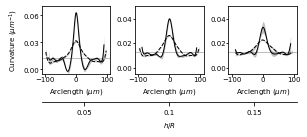

In [4]:
figsize = (10.56*cm_, 5.36*cm_)
fig,axs = plt.subplots(1,3, figsize = figsize)


main_xlabel = r"$h/R$"
thicknesses = [0.05, 0.1, 0.15]
spine_position = 4*Medium_font_size
col_vals = thicknesses
row_vals = ["4hAPF"]

main_ax = fig.add_subplot(111, frameon=True, alpha = 0.5)
main_ax.set_facecolor('none')
# Hide the right and top spines
main_ax.spines['right'].set_visible(False)
main_ax.spines['top'].set_visible(False)
main_ax.spines['left'].set_visible(False)#set_position(('outward', spine_position))
main_ax.spines['bottom'].set_position(('outward', spine_position))
main_ax.set_xlabel(main_xlabel, fontsize = Medium_font_size, labelpad = Small_font_size)

main_ax.set_xlim(-0.5,len(col_vals) -0.5)
main_ax.set_ylim(-0.5, len(row_vals) -0.5)
#tick_intervals_x = [round(x,2) for x in col_vals]
tick_intervals_x = col_vals
tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
main_ax.set_xticks(range(len(tick_intervals_x_str)), tick_intervals_x_str, fontsize = Medium_font_size)
main_ax.set_yticks([])
main_ax.tick_params(axis=u'both', which=u'both',length=Medium_font_size/2)
#main_ax.set_title(main_title, fontsize = 40, y = 1.1)

for i in range(len(thicknesses)):
    
    ax = axs[i]
    thickness = thicknesses[i]
    
    for crosssection in crosssections:

        linestyle = "-" if crosssection == "Across_DV" else "--"
        df = df_mean.query("devstage == @devstage and crosssection == @crosssection and thickness == @thickness")
        #ax.plot(df["arclength"], df["curvature"], color = "black", linestyle = linestyle, linewidth = lw)
        ax.fill_between(x = df['arclength'].tolist(), y1 = (df['curvature'] - df['curvature_sd']).tolist(), y2 = (df['curvature'] + df['curvature_sd']).tolist(), 
                        color = 'gray', alpha = 0.5, linewidth = 0,)
        ax.plot(df['arclength'], df['curvature'], label = crosssection, linewidth = lw, color = 'black', linestyle = linestyle,
               )

    if thickness == 0.05:
        ax.set_ylim(-0.005, 0.07)
        ax.set_yticks([0,0.03,0.06])
    else:
        ax.set_ylim(-0.005,0.05)
        ax.set_yticks([0,0.02,0.04])
    ax.set_xlim(-110, 110)
    ax.set_xticks([-100,0,100])
    ax.tick_params(axis = 'both', labelsize = Medium_font_size, length = Small_font_size/2, pad = 0)
    ax.set_xlabel('Arclength ' + r'$(\mu m)$', fontsize = Medium_font_size)

    if i == 0:
        ax.set_ylabel('Curvature ' + r'$(\mu m^{-1})$', fontsize = Medium_font_size)
    ax.axhline(y = 0.0128, linewidth = lw/2, linestyle = '-', color = "gray", zorder = 0)

fig.tight_layout(pad = 0.3)
fig.savefig("plots/WT_curvature_thickness.pdf", bbox_inches = "tight")


## Plot single thickness (0.01)

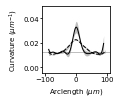

In [5]:
figsize = (3.1*cm_, 3.13*cm_)
fig,ax = plt.subplots(figsize = figsize)

thickness = thicknesses[i]

for crosssection in crosssections:

    linestyle = "-" if crosssection == "Across_DV" else "--"
    df = df_mean.query("devstage == @devstage and crosssection == @crosssection and thickness == @thickness")
    #ax.plot(df["arclength"], df["curvature"], color = "black", linestyle = linestyle, linewidth = lw)
    ax.fill_between(x = df['arclength'].tolist(), y1 = (df['curvature'] - df['curvature_sd']).tolist(), y2 = (df['curvature'] + df['curvature_sd']).tolist(), 
                    color = 'gray', alpha = 0.5, linewidth = 0,)
    ax.plot(df['arclength'], df['curvature'], label = crosssection, linewidth = lw, color = 'black', linestyle = linestyle,
           )
    
ax.set_ylim(-0.005,0.05)
ax.set_yticks([0,0.02,0.04])
ax.set_xlim(-110, 110)
ax.set_xticks([-100,0,100])
ax.tick_params(axis = 'both', labelsize = Medium_font_size, length = Small_font_size/2, pad = 0)
ax.set_xlabel('Arclength ' + r'$(\mu m)$', fontsize = Medium_font_size)
ax.set_ylabel('Curvature ' + r'$(\mu m^{-1})$', fontsize = Medium_font_size)
ax.axhline(y = 0.0128, linewidth = lw/2, linestyle = '-', color = "gray", zorder = 0)
fig.savefig("plots/WT_curvature_thickness_0.1.pdf", bbox_inches = "tight")


# Plotting data

In [6]:
exp_data_path = "/Users/krishna/PhD/WingDiscEversion_theory/Experiments/data/segmented_curves/"
genotype = "ecadGFPnbG4"

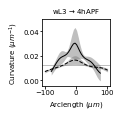

In [7]:

figsize = (3.1*cm_, 3.13*cm_)
fig,ax = plt.subplots(figsize = figsize)

devstage = "4hAPF"
crosssections = ["Along_DV", "Across_DV"]

for crosssection in crosssections:
    df_mean = pd.read_csv(exp_data_path + crosssection + "_" + genotype + "_pouchShape_interpolated_mean.csv")
    df = df_mean[df_mean['devstage'] == devstage]
    linestyle = "-" if crosssection == "Across_DV" else "--"
    max_pathlength_df = pd.read_csv(exp_data_path + "max_pathlength_df_"+genotype+".csv")
    arclength_threshold = max_pathlength_df.query("devstage == @devstage and crosssection == @crosssection")["max_pathlength"].values[0]
    df = df[np.abs(df["arclength"]) <= arclength_threshold]
    #plot
    ax.plot(df['arclength'], df['curvature'],color = 'black',linewidth = lw, label = crosssection, zorder = 2, linestyle = linestyle)
    ax.fill_between(x = df['arclength'].tolist(), y1 = (df['curvature'] - df['curvature_sd']).tolist(), y2 = (df['curvature'] + df['curvature_sd']).tolist(), 
                    color = 'gray', alpha = 0.5, linewidth = 0,)

    
ax.axhline(y = 0.0128, linewidth = lw/2, linestyle = '-', color = "gray", zorder = 0)
ax.set_ylim(-0.005, 0.05)
ax.set_xlim(-110, 110)
ax.set_xlabel("Arclength " + r"$(\mu m)$", fontsize = Medium_font_size)
ax.set_ylabel("Curvature " + r"$(\mu m^{-1})$", fontsize = Medium_font_size)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size, pad = 0, length = Small_font_size/2)
_ = ax.set_yticks([0,0.02, 0.04])
_ = ax.set_xticks([-100,0,100])
ax.set_title("wL3 " + r"$\to$" + " 4hAPF", fontsize = Medium_font_size)

os.makedirs("sim_output/plots/", exist_ok = True)
fig.savefig(f"plots/data_curvature_{devstage}.pdf", bbox_inches = "tight")

